<a href="https://colab.research.google.com/github/michaeledge27/CSCI290/blob/main/notebooks/premierLeagueProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
url = "https://github.com/michaeledge27/CSCI290/raw/main/data/matches.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [6]:

df['win'] = (df['result']=='W') * 1
df['win'].head()

,win
0,1
1,0
2,0
3,1
4,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_set, test_set = train_test_split(df, test_size = 0.2, shuffle = True)

In [9]:
def Attribute_selection_method(dataFrame, target, measure):
  features = dataFrame.columns[dataFrame.columns != target]
  # splittingMeasure = dataFrame.columns[df.columns[1] if df.columns[1] != target else df.columns[2]]
  if measure == 'entropy':
    # calculate max entropy
    for feature in features:
      entropiesList = []
      counts = np.bincount(feature) #change to props stuff
      countProb = counts/len(features)
      entropyValue = -np.sum(countProb * np.log2(countProb))
      entropiesList.append(entropyValue)
      return features[entropiesList.index(min(entropiesList))]


  elif measure == 'gini':
    # calculate max entropy
    for feature in features:
      giniList = []
      counts = np.bincount(feature)
      countProb = counts/len(features)
      giniValue = 1 - np.sum(np.square(countProb))
      giniList.append(giniValue)
      return features[giniList.index(max(giniList))]

  else:
    return None


In [10]:
target = "win"
attribute = "xga"

In [11]:
vals = df[attribute].unique()
vals

array([0.6, 2.9, 2.4, 0.9, 0.3, 0.5, 1.2, 0.7, 0.4, 0.8, 0.2, 0.1, 1. ,
       1.5, 1.7, 1.6, 2.2, 1.1, 2.5, 3.4, 2. , 1.3, 1.8, 1.4, 2.7, 2.3,
       3.5, 1.9, 2.1, 3.1, 2.6, 4.1, 3.6, 0. , 3.3, 3. , 3.2, 3.9, 2.8,
       4.7, 3.7, 4. , 3.8, 7. , 4.5, 4.2, 5.2, 4.4, 4.3, 5.9, 4.6])

In [12]:
props = df[df[attribute] == vals[8]][target].value_counts(normalize=True)
props

,proportion
win,
1,0.649425
0,0.350575


In [13]:
entropy = 0
for i in range(len(props)):
  entropy = entropy - props[i]*math.log2(props[i])
entropy

0.9345802754794623

In [14]:
entropy = 0
entropyLists = []
for val in vals:
  weight = (len(df[df[attribute] == val])) /(len(df))
  props = df[df[attribute] == val][target].value_counts(normalize=True)
  for p in range(len(props)):
    entropy = entropy - weight*(p*(np.log2)(p))
    entropyLists.append(entropy)
returnValue = vals[entropyLists.index(min(entropyLists))]
returnValue


<ipython-input-14-60b436c7c705>:7: RuntimeWarning: divide by zero encountered in log2
  entropy = entropy - weight*(p*(np.log2)(p))
<ipython-input-14-60b436c7c705>:7: RuntimeWarning: invalid value encountered in scalar multiply
  entropy = entropy - weight*(p*(np.log2)(p))


0.6

In [15]:
giniImpurity = 0
giniLists = []
for val in vals:
  weight = (len(df[df[attribute] == val])) /(len(df))
  props = df[df[attribute] == val][target].value_counts(normalize=True)
  for p in range(len(props)):
    gini = 1 - np.sum(np.square(p))
    giniLists.append(gini)
returnValue = vals[giniLists.index(max(giniLists))]
returnValue

0.6

In [16]:
entropy = 0
giniImpurity = 0
def attribute_selection_method2(df, attribute, measure):
  vals = df[attribute].unique()

  if measure == 'entropy':
    entropyLists = []
    for val in vals:
      weight = (len(df[df[attribute] == val])) /(len(df))
      props = df[df[attribute] == val][target].value_counts(normalize=True)
      for p in range(len(props)):
        entropy = entropy - weight*(p*(np.log2)(p))
        entropyLists.append(entropy)
    return vals[np.argmin(entropyLists)]

  if measure == 'gini':
    giniLists = []
    for val in vals:
      weight = (len(df[df[attribute] == val])) /(len(df))
      props = df[df[attribute] == val][target].value_counts(normalize=True)
      for p in range(len(props)):
        gini = 1 - (weight * np.sum(np.square(p)))
        giniLists.append(gini)
    return vals[np.argmax(giniLists)]

  else:
    raise ValueError("Measure must be 'entropy' or 'gini'")






In [17]:
train_set.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team', 'win'],
      dtype='object')

In [18]:
train_set = train_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk', 'win']]

In [19]:
test_set = test_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk', 'win']]

In [20]:
X_train = train_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk']]
y_train = train_set[['win']]

In [21]:
X_test = test_set[['round', 'venue', 'xga', 'poss', 'sot', 'fk', 'pk']]
y_test = test_set[['win']]

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3830 entries, 2446 to 1293
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   round   3830 non-null   object 
 1   venue   3830 non-null   object 
 2   xga     3830 non-null   float64
 3   poss    3830 non-null   int64  
 4   sot     3830 non-null   int64  
 5   fk      3830 non-null   int64  
 6   pk      3830 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 239.4+ KB


In [25]:
num_attributes = X_train.select_dtypes(include = ['int64', 'float64']).columns
cat_attributes = X_train.select_dtypes(include = ['object']).columns

In [26]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [27]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=4))])

In [28]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.74020888, 0.73759791, 0.72715405, 0.72845953, 0.71801567])

In [29]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='f1')

array([0.67642276, 0.65758092, 0.59574468, 0.57723577, 0.58461538])

In [30]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['xga', 'poss', 'sot', 'fk', 'pk'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['round', 'venue'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=4))])

In [31]:
predictions = pipeline.predict( X_test )

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
cm = confusion_matrix( y_test, predictions )
cm

array([[501,  71],
       [189, 197]])

[Text(0.5, 0.9, 'x[2] <= 0.496\ngini = 0.478\nsamples = 3830\nvalue = [2321, 1509]'),
 Text(0.25, 0.7, 'x[0] <= -0.264\ngini = 0.406\nsamples = 2747\nvalue = [1969, 778]'),
 Text(0.125, 0.5, 'x[4] <= 1.116\ngini = 0.495\nsamples = 1135\nvalue = [627, 508]'),
 Text(0.0625, 0.3, 'x[2] <= -0.718\ngini = 0.479\nsamples = 1000\nvalue = [602, 398]'),
 Text(0.03125, 0.1, 'gini = 0.308\nsamples = 294\nvalue = [238, 56]'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 706\nvalue = [364, 342]'),
 Text(0.1875, 0.3, 'x[10] <= 0.5\ngini = 0.302\nsamples = 135\nvalue = [25, 110]'),
 Text(0.15625, 0.1, 'gini = 0.264\nsamples = 128\nvalue = [20, 108]'),
 Text(0.21875, 0.1, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.375, 0.5, 'x[2] <= -0.314\ngini = 0.279\nsamples = 1612\nvalue = [1342, 270]'),
 Text(0.3125, 0.3, 'x[2] <= -1.123\ngini = 0.195\nsamples = 1014\nvalue = [903, 111]'),
 Text(0.28125, 0.1, 'gini = 0.043\nsamples = 317\nvalue = [310, 7]'),
 Text(0.34375, 0.1, 'gini = 0.254\nsamples = 

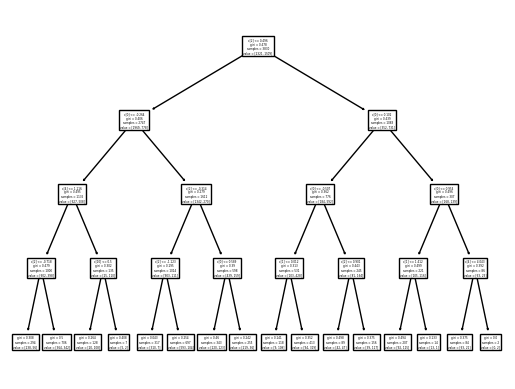

In [35]:
plot_tree(pipeline.named_steps['clf'])

In [34]:
import sklearn.metrics as metrics